In [1]:
import django
import sys, os
import platform
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta
import numpy as np

if platform.node() == "srv-mcc-apsis":
    #sys.path.append("/home/galm/software/django/tmv/BasicBrowser/")
    sys.path.append('/home/leey/tmv/BasicBrowser/')
else:
    # local paths
    sys.path.append('/home/leey/Documents/Data/tmv/BasicBrowser/')
os.environ.setdefault("DJANGO_SETTINGS_MODULE", "BasicBrowser.settings")
django.setup()

#import from appended path
import scoping.models as sm
import twitter.models as tm
import parliament.models as pm

from django.db.models import Sum, Count, Q
from django.db.models.fields import DateField
from django.db.models.functions import Cast
import textwrap as tw
import datetime
import random

import igraph
#import mpld3

from adjustText import adjust_text

In [2]:
# Style
import seaborn as sns
sns.set_style('whitegrid')

---

## getting counts

In [11]:
term1 = tm.TwitterSearch.objects.filter(string='Klima')
count1 = tm.Status.objects.filter(
    searches__in=term1,
    text__isnull=False,
    retweeted_status__isnull=True,
)
count1.count()

2554869

In [12]:
# checking count
term2 = tm.TwitterSearch.objects.filter(string='globale Erwärmung')
count2 = tm.Status.objects.filter(
    searches__in=term2,
    text__isnull=False,
    retweeted_status__isnull=True,
)
count2.count()

18978

In [13]:
# checking count
term3 = tm.TwitterSearch.objects.filter(string='Erderwärmung')
count3 = tm.Status.objects.filter(
    searches__in=term3,
    text__isnull=False,
    retweeted_status__isnull=True,
)
count3.count()

60982

In [14]:
# checking count
term4 = tm.TwitterSearch.objects.filter(string='Treibhauseffekt')
count4 = tm.Status.objects.filter(
    searches__in=term4,
    text__isnull=False,
    retweeted_status__isnull=True,
)
count4.count()

13059

In [17]:
df_c4 = pd.DataFrame(list(count4.values_list('id','created_at','text', 'lang')), 
                          columns=['id','created_at','text', 'lang'])

In [19]:
df_c4.sort_values(by='created_at', ascending=False)

,id,created_at,text,lang
13039,1237095765195005954,2020-03-09 19:19:49+00:00,@R3in3rZuf4ll @VQuaschning Weil der Treibhause...,de
13045,1237094930121719809,2020-03-09 19:16:30+00:00,@danny_ski6 Nun aber zum Artikel:\nDer Artikel...,de
13046,1237094870721986568,2020-03-09 19:16:15+00:00,@JoachimAmann Wie sollen 415Teile von 1 Mil Te...,de
13047,1237091690193838083,2020-03-09 19:03:37+00:00,@R3in3rZuf4ll @VQuaschning Vom Beleidigen wird...,de
13048,1237090662291591169,2020-03-09 18:59:32+00:00,RT @Howie__Official: In Asien fressen die sowa...,de
13049,1237066428450308097,2020-03-09 17:23:14+00:00,@JoachimAmann Die größte Lüge der Menschheitsg...,de
13050,1237063821774241794,2020-03-09 17:12:53+00:00,RT @Howie__Official: In Asien fressen die sowa...,de
13051,1237063554244763649,2020-03-09 17:11:49+00:00,RT @Howie__Official: In Asien fressen die sowa...,de
13052,1237061605533396994,2020-03-09 17:04:04+00:00,In Asien fressen die sowas und wundern sich üb...,de
13053,1237030159410237441,2020-03-09 14:59:07+00:00,@Trogambouille @beritmiriam @WASDMagazin Richt...,de


## getting data

NEW: extend data to end Feb 2020, run scores on those

In [20]:
p = sm.Project.objects.get(pk=228)

In [21]:
start_date = datetime.datetime.strptime('2017-01-01-+0000', '%Y-%m-%d-%z')

In [22]:
end_date = datetime.datetime.strptime('2020-03-01-+0000', '%Y-%m-%d-%z')

In [23]:
# Get tweets related to the project
searches = tm.TwitterSearch.objects.filter(project_list=p)

---

### Filter for relevant keywords

filter tweets in 'Kohle' set using relevant hashtags, then add tweets from other TS objects to joint dataset

In [24]:
query = tm.Status.objects.filter(
    searches__in=searches,
    text__isnull=False,
    retweeted_status__isnull=True,
    created_at__gte=start_date,
    created_at__lte=end_date
)

In [25]:
query.count()

1230775

In [26]:
tweet_ids = set(query.values_list('id',flat=True))

In [27]:
texts = tm.Status.objects.filter(
    id__in=tweet_ids
).values_list('id','created_at','text', 'lang')

In [28]:
df_texts = pd.DataFrame(list(texts), columns=['id','created_at','text', 'lang'])

In [29]:
# getting german tweets only
is_de = df_texts["lang"]=="de"
texts_de = df_texts[is_de]

---

## Sentiment Analysis

In [30]:
import spacy
from spacy_sentiws import spaCySentiWS

nlp = spacy.load('de')
sentiws = spaCySentiWS(sentiws_path='../SentiWS')
nlp.add_pipe(sentiws)

In [31]:
def get_senti_score(tweet):
    """gets the score of a tweet from SentiWS"""
    scores = []
    for token in tweet:
        score = token._.sentiws
        if score is not None:
            scores.append(score)
    
    if sum(scores) != 0:
        return sum(scores)/len(scores)
    else:
        return 0

---

### Actual

In [32]:
texts_scores = []
for i in texts_de.index:
    entry = texts_de.loc[i]
    doc = nlp(entry['text'])
    tweet_score = get_senti_score(doc)
    texts_scores.append(tweet_score)

In [33]:
texts_de['score'] = texts_scores

/home/leey/tmv/BasicBrowser/venv/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [34]:
# return new column with date 
date_only = []
for i in texts_de.index:
    entry = texts_de.loc[i]
    entry_date = entry['created_at'].date()
    date_only.append(entry_date)

In [35]:
texts_de['date_only'] = date_only
texts_de.head()

/home/leey/tmv/BasicBrowser/venv/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,id,created_at,text,lang,score,date_only
0,929067156607766529,2017-11-10 19:24:06+00:00,Ich mache beim Online Climate March mit. Wir b...,de,0.00000,2017-11-10
2,1138064056315764736,2019-06-10 12:43:09+00:00,@Der_KaiErik Könnte mir Schlimmeres vorstellen...,de,0.37160,2019-06-10
3,928998421133975552,2017-11-10 14:50:58+00:00,Ich mache beim Online Climate March mit. Wir b...,de,0.00000,2017-11-10
7,968141946152718337,2018-02-26 15:13:21+00:00,"""Es ist doch so kalt gerade, gibt es die Erder...",de,0.03515,2018-02-26
8,847060213677084673,2017-03-29 12:17:47+00:00,@dieLinke Das Klima reguliert sich selber seit...,de,-0.59010,2017-03-29


In [99]:
texts_de.to_csv('texts_de_climate_20200312.csv')

---

### Results

In [25]:
# importing results from csv
texts_de_old = pd.read_csv('texts_de_20200226.csv', index_col=[0])

/home/leey/tmv/BasicBrowser/venv/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [28]:
# combining
texts_de_comb = pd.concat([texts_de_old, texts_de], ignore_index=True, sort=False)

In [106]:
texts_de_comb.to_csv('texts_de_comb_20200309.csv')

In [29]:
# renaming objects
texts_de_new = texts_de
texts_de = texts_de_comb

In [3]:
texts_de = pd.read_csv('texts_de_climate_20200311.csv', index_col=[0], lineterminator='\n')

---

In [4]:
texts_de['date_only'] =  pd.to_datetime(texts_de['date_only'])

In [39]:
texts_de.head()

,id,created_at,text,lang,score,date_only
0,929067156607766529,2017-11-10 19:24:06+00:00,Ich mache beim Online Climate March mit. Wir b...,de,0.00000,2017-11-10
2,1138064056315764736,2019-06-10 12:43:09+00:00,@Der_KaiErik Könnte mir Schlimmeres vorstellen...,de,0.37160,2019-06-10
3,928998421133975552,2017-11-10 14:50:58+00:00,Ich mache beim Online Climate March mit. Wir b...,de,0.00000,2017-11-10
7,968141946152718337,2018-02-26 15:13:21+00:00,"""Es ist doch so kalt gerade, gibt es die Erder...",de,0.03515,2018-02-26
8,847060213677084673,2017-03-29 12:17:47+00:00,@dieLinke Das Klima reguliert sich selber seit...,de,-0.59010,2017-03-29


In [5]:
len(texts_de)

776951

In [41]:
texts_de['score'].isna().sum()

0

In [42]:
# removing missing data
texts_de = texts_de.dropna(subset=['score'])
len(texts_de)

776951

In [43]:
average_score = sum(texts_de['score'])/len(texts_de['score'])
average_score

-0.024299551257289345

In [44]:
texts_de_daily_count = texts_de.groupby(pd.Grouper(key='date_only',freq='D'))['id'].count()

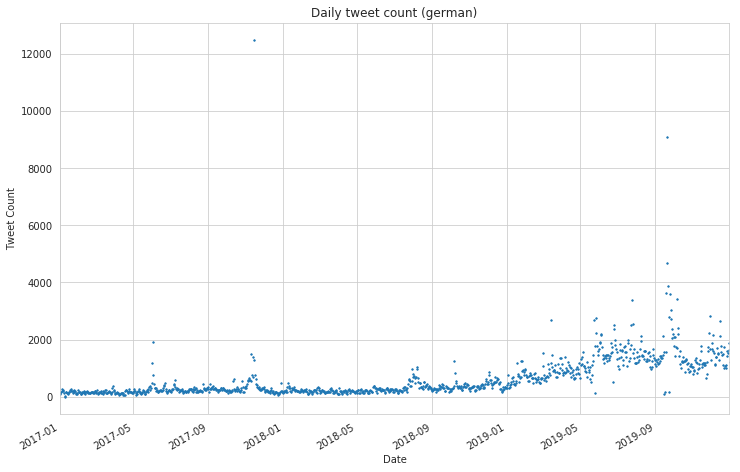

In [46]:
# tweet freq over time
fig, ax = plt.subplots(figsize=(12,8))
sns.scatterplot(texts_de_daily_count.index, texts_de_daily_count, marker='.', s=10, edgecolor=None)
ax.set(xlim=(datetime.datetime.strptime('2017-01-01', '%Y-%m-%d'), datetime.datetime.strptime('2019-12-31', '%Y-%m-%d')),
       #ylim=(0,1000),
       xlabel="Date",
       ylabel="Tweet Count", 
       title="Daily tweet count (german)")
#ax.axvline(x=(datetime.datetime.strptime('2018-06-06', '%Y-%m-%d')), ls ='-.',lw='0.75', c = 'k')
fig.autofmt_xdate()
plt.show()

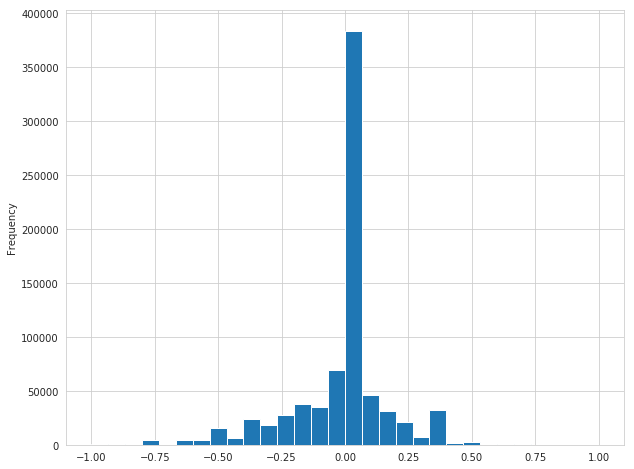

In [47]:
fig, ax = plt.subplots(figsize=(10,8))

texts_de['score'].plot.hist(bins=30)

plt.show()

In [48]:
most_neg = texts_de.sort_values(by=['score'])[0:10]
for i in most_neg.index:
    print(most_neg.loc[i]['text'])

Siemens-Boykott: Die Gefahren des Ökotiger-Schwanzes https://t.co/4CJ4evLaDS via @EIKE_KLIMA
Jaír Bolsonaro bringt das Klima in Gefahr https://t.co/FOYiNYjr6L
@knforfuture @RWE_AG Ökofanatiker und Klimapsychos sind nicht nur eine Gefahr für die Gesellschaft, sondern auch für das Klima.

Rund zehn vermummte Personen hätten die Angestellten mit Steinen und Molotowcocktails beworfen.  https://t.co/CwIa4G5Yxh …
Russland stellt sich auf Klimawandel ein: Lange hat sich Russland geweigert, Gefahren durch die Erderwärmung überh… https://t.co/STiLX2s4i3
"Das #Paris-Abkommen ist in Gefahr

Seit Jahren wird die Debatte um den klimapolitisch notwendigen #Kohleausstieg... https://t.co/QwpT0nPd5e
RT @Balelt41: Welche Gefahren
gehen von Stickoxiden, Feinstaub+CO2 aus?
Kohle-(Energie-), Verkehrs-,Agrar-+Industriepolitik der BReg
beschl…
@Polizei_NRW_AC Bringen Sie nicht das Klima in Gefahr!
@AufgewachteWelt Neben Wetterleuchten gibt es jetzt auch Klima-Leuchten. Letztere sind eine ernstzunehmende andr

In [49]:
most_pos = texts_de.sort_values(by=['score'], ascending=False)[0:10]
for i in most_pos.index:
    print(most_pos.loc[i]['text'])

Wieder mal ein sehr gelungener @maschek_org. Das gestörte Klima https://t.co/XwvbIsJvY1
Spiele mit Mission: 8 gelungene Games zu Umwelt &amp;#038; Klima https://t.co/3L7UPj7XuZ
Spiele mit Mission: 8 gelungene #Games zu #Umwelt und #Klima: https://t.co/r22satnhyo #fridaysforfuturegaming #gaming
Die gelungene Anmoderation :"Das Gespräch sagt einiges aus über das Klima in dem amerikanische Hauptstadtjournalisten derzeit in den USA arbeiten." #Reuters
Wir sind Mitglied bei https://t.co/Ov7CQgXsti und finden es eine wirklich gelungene Seite für Handwerksbetriebe. https://t.co/SH8x7pNvPu
Nach der "Geschichte der Bienen" ist "Die Geschichte des Wassers" von #MajaLunde eine sehr gelungene Fortsetzung des Klima-Quartetts. Sehr empfehlenswert! https://t.co/ZR3438AEI2 @audibleDE #HB #Wasser #Klimawandel #Rezension
@krasmanalderey @MeyerMensch @helenamarschalI @FFF_Berlin @SiemensDE Und nochmals, es gibt in der Realität keinen einzigen gelungenen Nachweis, dass CO2 das Klima steuert. Das sind Hirn

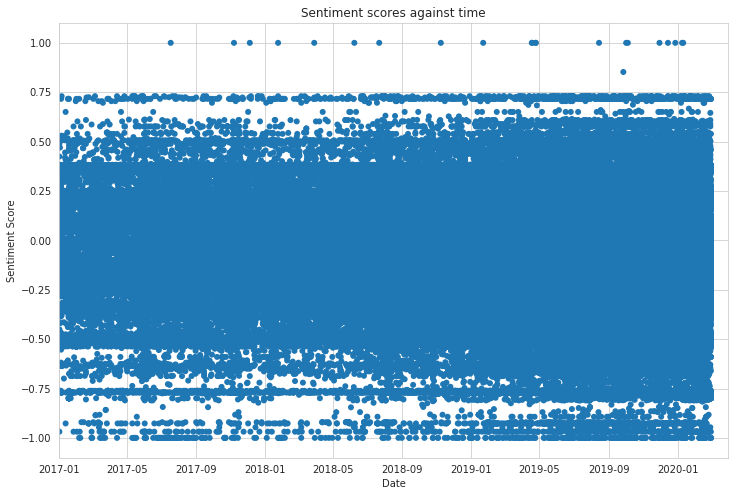

In [50]:
fig, ax = plt.subplots(figsize=(12,8))
sns.scatterplot(texts_de['date_only'], texts_de['score'], edgecolor='', ax = ax)
ax.set(xlim=(datetime.datetime.strptime('2017-01-01', '%Y-%m-%d'), datetime.datetime.strptime('2020-03-31', '%Y-%m-%d')), xlabel="Date",ylabel="Sentiment Score", title="Sentiment scores against time")
plt.show()

In [6]:
texts_de_daily = texts_de.groupby(pd.Grouper(key='date_only',freq='D'))['score'].mean()

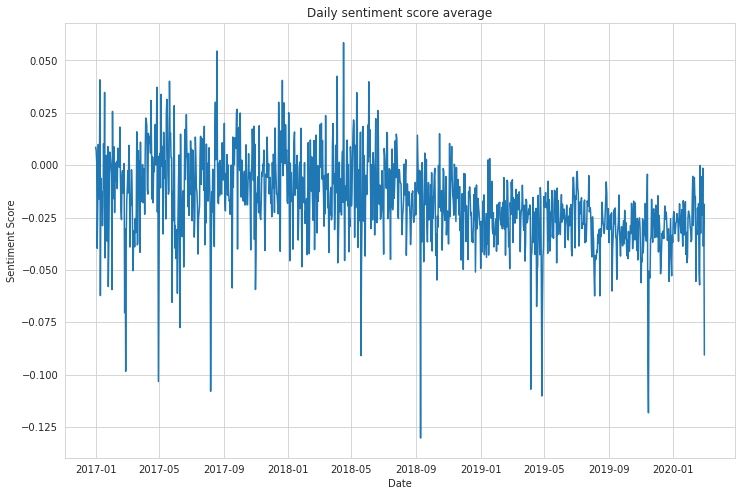

In [52]:
fig, ax = plt.subplots(figsize=(12,8))
sns.lineplot(texts_de_daily.index, texts_de_daily, ax = ax)
ax.set(xlabel="Date",
       ylabel="Sentiment Score", 
       title="Daily sentiment score average")
plt.show()
#fig.savefig('plots/dailyavgsenti.png', dpi=300)

/home/leey/tmv/BasicBrowser/venv/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


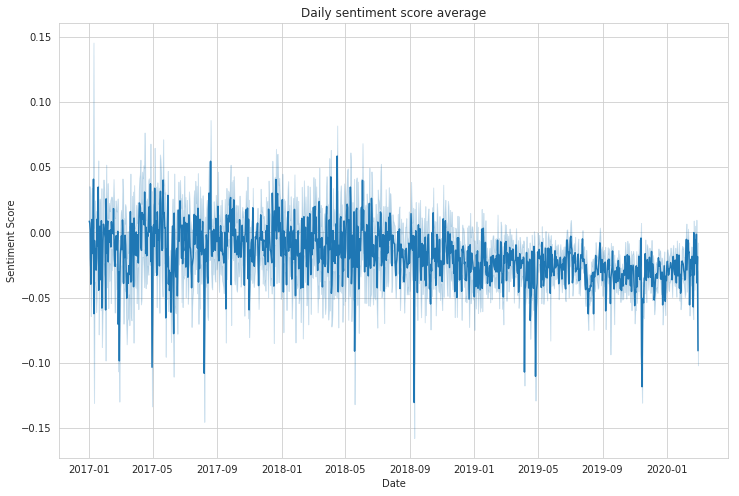

In [53]:
# average with variation
fig, ax = plt.subplots(figsize=(12,8))
sns.lineplot('date_only', 'score', data = texts_de, ax = ax)
ax.set(xlabel="Date",
       ylabel="Sentiment Score", 
       title="Daily sentiment score average")
plt.show()

In [54]:
texts_de_monthly = texts_de.groupby(pd.Grouper(key='date_only',freq='M'))['score'].mean()

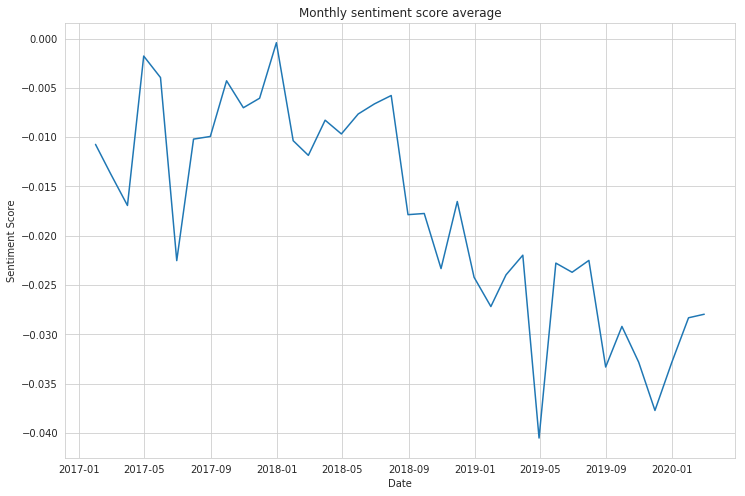

In [55]:
fig, ax = plt.subplots(figsize=(12,8))
sns.lineplot(texts_de_monthly.index, texts_de_monthly, ax = ax)
ax.set(xlabel="Date",ylabel="Sentiment Score", title="Monthly sentiment score average")
plt.show()
#fig.savefig('plots/monthlyavgsenti.png', dpi=300)

In [56]:
texts_de_yearly = texts_de.groupby(pd.Grouper(key='date_only',freq='Y'))['score'].mean()

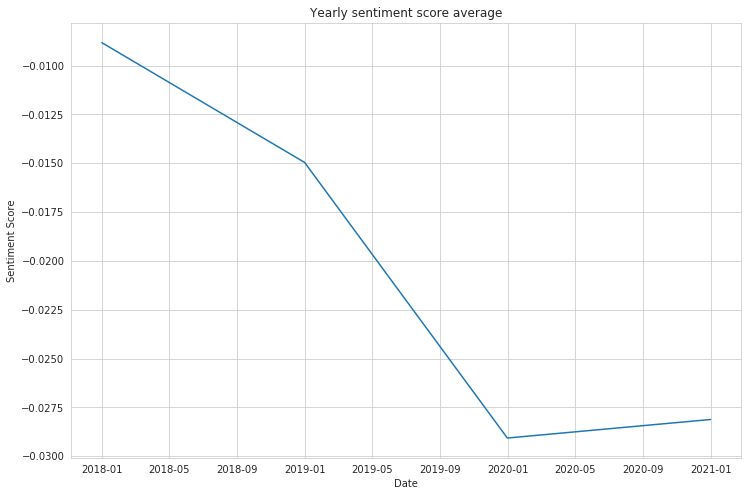

In [57]:
fig, ax = plt.subplots(figsize=(12,8))
sns.lineplot(texts_de_yearly.index, texts_de_yearly, ax = ax)
ax.set(xlabel="Date",ylabel="Sentiment Score", title="Yearly sentiment score average")
plt.show()
#fig.savefig('plots/yearlyavgsenti.png', dpi=300)

In [58]:
texts_de_daily.sort_values(ascending=False)[:10]

date_only
2018-04-16    0.058498
2017-08-19    0.054496
2018-04-04    0.042506
2017-01-09    0.040764
2017-12-21    0.040494
2017-05-21    0.040107
2018-06-03    0.039829
2017-04-27    0.037205
2017-01-18    0.034737
2018-05-11    0.034655
Name: score, dtype: float64

In [59]:
texts_de_daily.sort_values()[:10]

date_only
2018-09-09   -0.130331
2019-11-15   -0.118271
2019-04-27   -0.110257
2017-08-07   -0.107999
2019-04-06   -0.107008
2017-04-30   -0.103334
2017-02-27   -0.098448
2019-11-14   -0.093865
2018-05-19   -0.090975
2020-02-29   -0.090676
Name: score, dtype: float64

In [60]:
positive_day = texts_de['date_only'] == datetime.date(2018,4,16)
positive_day_tweets = texts_de[positive_day]

/home/leey/tmv/BasicBrowser/venv/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and 'the values will not compare equal to the
'datetime.date'. To retain the current behavior, convert the
'datetime.date' to a datetime with 'pd.Timestamp'.
  """Entry point for launching an IPython kernel.


In [61]:
positive_day_tweets.sort_values(by='score', ascending=False)[:20]

,id,created_at,text,lang,score,date_only
924520,985780182698090497,2018-04-16 07:21:25+00:00,"Angenehmes Klima in der Schule. Keine Hitze, ü...",de,0.48870,2018-04-16
12241,985891266809552896,2018-04-16 14:42:49+00:00,Es ist einfach so Nervig mit den Klima Wandel ...,de,0.38220,2018-04-16
378642,985993913809825792,2018-04-16 21:30:42+00:00,@Gegen_die_AfD Die Anfrage hat sich spätestens...,de,0.37960,2018-04-16
1086933,985971144619589639,2018-04-16 20:00:13+00:00,Stadt Rheinbach radelt erstmalig für ein gutes...,de,0.37160,2018-04-16
644701,985861704176357377,2018-04-16 12:45:21+00:00,Prima Klima in der Garage – Beste Energieeffiz...,de,0.37160,2018-04-16
520133,985890524878995456,2018-04-16 14:39:52+00:00,Streuobst für ein besseres Klima und die Ökobi...,de,0.37160,2018-04-16
223659,985861686744748033,2018-04-16 12:45:17+00:00,Prima Klima in der Garage – Beste Energieeffiz...,de,0.37160,2018-04-16
804690,985900775883902977,2018-04-16 15:20:36+00:00,Radeln für gutes Klima – „STADTRADELN“ im #Rhe...,de,0.37160,2018-04-16
749726,985825142268944385,2018-04-16 10:20:04+00:00,Becher für ein besseres Klima https://t.co/ycp...,de,0.37160,2018-04-16
748890,985788600443957248,2018-04-16 07:54:52+00:00,#Lahr radelt wieder für ein gutes #Klima - Vom...,de,0.37160,2018-04-16


In [62]:
most_pos_day = positive_day_tweets.sort_values(by='score', ascending=False)
for i in most_pos_day.index[:10]:
    print(most_pos_day.loc[i]['text'])

Angenehmes Klima in der Schule. Keine Hitze, überhaupt „keine“!!
Es ist einfach so Nervig mit den Klima Wandel da will man zur Stadt los gehen um zu versuchen ein wichtiges Kabel für seine #PS2Slim zu besorgen &amp; dann merkt man auf ein mal: "OHH, es Regnet"
Jetzt gehe nicht durch den Regen wegen 1 Kabel, wie einfach mal das Wetter Pläne versaut https://t.co/idHIAUEALY
@Gegen_die_AfD Die Anfrage hat sich spätestens in ein paar Tagen erledigt. Soll bis zu 28 Grad warm werden. Und das im April. Wetter halt, nicht Klima.
Stadt Rheinbach radelt erstmalig für ein gutes Klima! #RheinSieg https://t.co/bpHWalzXn2 https://t.co/WEAr6gTdjO
Prima Klima in der Garage – Beste Energieeffizienz-Werte durch isolierte Garagentore https://t.co/F1NcDT6wBO https://t.co/F1NcDT6wBO
Streuobst für ein besseres Klima und die Ökobilanz: https://t.co/2qxVJd9JL4
Prima Klima in der Garage – Beste Energieeffizienz-Werte durch isolierte Garagentore https://t.co/dkAqgNBJUm
Radeln für gutes Klima – „STADTRADELN“ im #

In [63]:
negative_day = texts_de['date_only'] == datetime.date(2018,9,9)
negative_day_tweets = texts_de[negative_day]

/home/leey/tmv/BasicBrowser/venv/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and 'the values will not compare equal to the
'datetime.date'. To retain the current behavior, convert the
'datetime.date' to a datetime with 'pd.Timestamp'.
  """Entry point for launching an IPython kernel.


In [64]:
negative_day_tweets.sort_values(by='score')[:20]

,id,created_at,text,lang,score,date_only
282235,1038657927832395776,2018-09-09 05:18:41+00:00,"Ganz schlecht für #Gruene, dass es ohne jedes ...",de,-0.7706,2018-09-09
1175969,1038729226663485440,2018-09-09 10:02:00+00:00,Der Handelsverband Deutschland warnt nach den ...,de,-0.7570,2018-09-09
1114273,1038730014844510208,2018-09-09 10:05:08+00:00,Der Handelsverband Deutschland warnt nach den ...,de,-0.7570,2018-09-09
234185,1038724100632530946,2018-09-09 09:41:38+00:00,Brief an die Kanzlerin: Handel warnt vor „Klim...,de,-0.5140,2018-09-09
404565,1038867506050555904,2018-09-09 19:11:29+00:00,Brief an die Kanzlerin: Handel warnt vor „Klim...,de,-0.5140,2018-09-09
503057,1038717711709294592,2018-09-09 09:16:15+00:00,@tagesschau Das Klima der Angst hat einen Name...,de,-0.5140,2018-09-09
538807,1038807368635744256,2018-09-09 15:12:31+00:00,Brief an die Kanzlerin: Handel warnt vor „Klim...,de,-0.5140,2018-09-09
634422,1038724450693210112,2018-09-09 09:43:02+00:00,"Handel warnt vor ""Klima der Angst"" https://t.c...",de,-0.5140,2018-09-09
653625,1038717950172307456,2018-09-09 09:17:12+00:00,@tagesschau Das Klima der Angst heißt Merkel.,de,-0.5140,2018-09-09
145521,1038809279409651712,2018-09-09 15:20:07+00:00,@sternde Klima der Angst in Deutschland https:...,de,-0.5140,2018-09-09


In [65]:
most_neg_day = negative_day_tweets.sort_values(by='score')
for i in most_neg_day.index[:10]:
    print(most_neg_day.loc[i]['text'])

Ganz schlecht für #Gruene, dass es ohne jedes Zutun der #Gruenen jetzt wieder kühler geworden ist. #Klima-Wahn https://t.co/iXdJOkdDxm
Der Handelsverband Deutschland warnt nach den #Chemnitz-Ausschreitungen vor einem „Klima der Angst“.  Er sieht den Wirtschaftsstandort Deutschland in Gefahr:  https://t.co/cZn6Avlg2j
Der Handelsverband Deutschland warnt nach den #Chemnitz-Ausschreitungen vor einem „Klima der Angst“.  Er sieht den Wirtschaftsstandort Deutschland in Gefahr:  https://t.co/f61mARYuO9
Brief an die Kanzlerin: Handel warnt vor „Klima der Angst“ https://t.co/xZrbMsSkN9 via @faznet
Brief an die Kanzlerin: Handel warnt vor „Klima der Angst“ https://t.co/SXK5HrhHJC via @faznet
@tagesschau Das Klima der Angst hat einen Namen: Angela Merkel!
Brief an die Kanzlerin: Handel warnt vor „Klima der Angst“ https://t.co/hhQNUy6KXj via @faznet
Handel warnt vor "Klima der Angst" https://t.co/aFv4Xvoz4R
@tagesschau Das Klima der Angst heißt Merkel.
@sternde Klima der Angst in Deutschland https

---

## Comparison with coal

In [7]:
texts_coal = pd.read_csv('texts_de_comb_20200309.csv', index_col=[0])

/home/leey/tmv/BasicBrowser/venv/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [8]:
texts_coal['date_only'] =  pd.to_datetime(texts_coal['date_only'])

In [9]:
texts_de_daily_coal = texts_coal.groupby(pd.Grouper(key='date_only',freq='D'))['score'].mean()

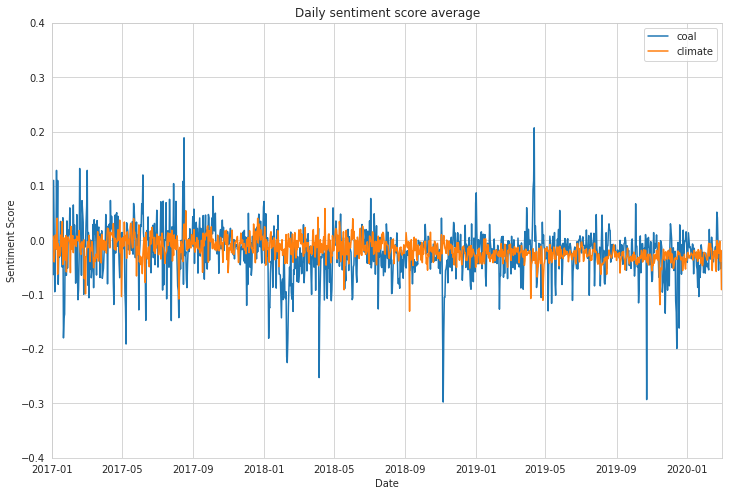

In [100]:
fig, ax = plt.subplots(figsize=(12,8))
sns.lineplot(texts_de_daily_coal.index, texts_de_daily_coal, label='coal', ax=ax)
sns.lineplot(texts_de_daily.index, texts_de_daily, label='climate', ax=ax)
ax.set(xlim=(datetime.datetime.strptime('2017-01-01', '%Y-%m-%d'), 
             datetime.datetime.strptime('2020-03-01', '%Y-%m-%d')),
       ylim=(-0.4,0.4),
       xlabel="Date",
       ylabel="Sentiment Score", 
       title="Daily sentiment score average")
ax.legend()
plt.show()
#fig.savefig('plots/dailyavgsenti_baseline.png', dpi=300)

In [10]:
# what about moving averages? 
texts_de_daily_sma = texts_de_daily.rolling(7, min_periods=1).mean()
texts_de_daily_coal_sma = texts_de_daily_coal.rolling(7, min_periods=1).mean()

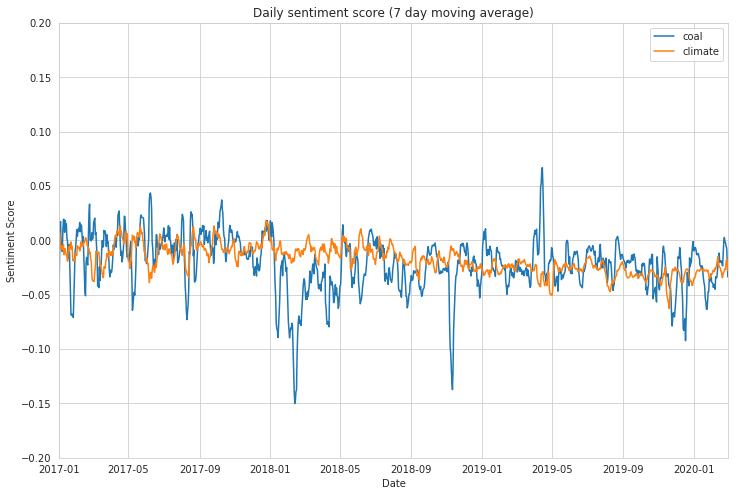

In [11]:
fig, ax = plt.subplots(figsize=(12,8))
sns.lineplot(texts_de_daily_coal_sma.index, texts_de_daily_coal_sma, ax = ax, label='coal')
sns.lineplot(texts_de_daily_sma.index, texts_de_daily_sma, ax = ax, label='climate')
ax.set(xlim=(datetime.datetime.strptime('2017-01-01', '%Y-%m-%d'), 
             datetime.datetime.strptime('2020-03-01', '%Y-%m-%d')),
       ylim=(-0.2,0.2),
       xlabel="Date",
       ylabel="Sentiment Score", 
       title="Daily sentiment score (7 day moving average)")
plt.legend()
plt.show()
fig.savefig('plots/dailyavgsenti_7dma_baseline.png', dpi=300, bbox_inches='tight')

---

## Looking at specific events

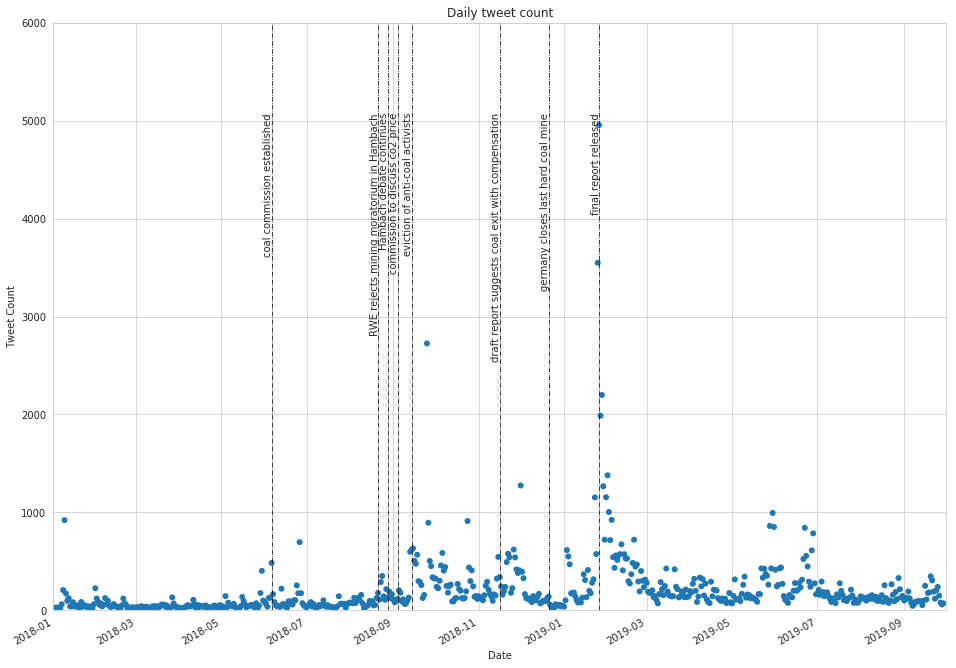

In [132]:
# overall picture with all events
# tweet freq
fig, ax = plt.subplots(figsize=(16,12))
sns.scatterplot(texts_de_daily_count.index, texts_de_daily_count, edgecolor='')
ax.set(xlim=(datetime.datetime.strptime('2018-01-01', '%Y-%m-%d'), 
             datetime.datetime.strptime('2019-10-01', '%Y-%m-%d')),
       ylim=(0,6000),
       xlabel="Date",
       ylabel="Tweet Count", 
       title="Daily tweet count")

# adding event titles
ax.axvline(x=(datetime.datetime.strptime('2018-06-06', '%Y-%m-%d')), ls ='-.',lw='0.75', c = 'k')
plt.text((datetime.datetime.strptime('2018-06-06', '%Y-%m-%d')-datetime.timedelta(days=6)),5000,
         'coal commission established',rotation=90, fontsize=10)
ax.axvline(x=(datetime.datetime.strptime('2018-08-21', '%Y-%m-%d')), ls ='-.',lw='0.75', c = 'k')
plt.text((datetime.datetime.strptime('2018-08-21', '%Y-%m-%d')-datetime.timedelta(days=6)),5000,
         'RWE rejects mining moratorium in Hambach',rotation=90, fontsize=10)
ax.axvline(x=(datetime.datetime.strptime('2018-08-28', '%Y-%m-%d')), ls ='-.',lw='0.75', c = 'k')
plt.text((datetime.datetime.strptime('2018-08-28', '%Y-%m-%d')-datetime.timedelta(days=6)),5000,
         'Hambach debate continues',rotation=90, fontsize=10)
ax.axvline(x=(datetime.datetime.strptime('2018-09-04', '%Y-%m-%d')), ls ='-.',lw='0.75', c = 'k')
plt.text((datetime.datetime.strptime('2018-09-04', '%Y-%m-%d')-datetime.timedelta(days=6)),5000,
         'commission to discuss co2 price',rotation=90, fontsize=10)
ax.axvline(x=(datetime.datetime.strptime('2018-09-14', '%Y-%m-%d')), ls ='-.',lw='0.75', c = 'k')
plt.text((datetime.datetime.strptime('2018-09-14', '%Y-%m-%d')-datetime.timedelta(days=6)),5000,
         'eviction of anti-coal activists',rotation=90, fontsize=10)
ax.axvline(x=(datetime.datetime.strptime('2018-11-16', '%Y-%m-%d')), ls ='-.',lw='0.75', c = 'k')
plt.text((datetime.datetime.strptime('2018-11-16', '%Y-%m-%d')-datetime.timedelta(days=6)),5000,
         'draft report suggests coal exit with compensation',rotation=90, fontsize=10)
#ax.axvline(x=(datetime.datetime.strptime('2018-11-19', '%Y-%m-%d')), ls ='-.',lw='0.75', c = 'k')
#plt.text((datetime.datetime.strptime('2018-11-19', '%Y-%m-%d')-datetime.timedelta(days=6)),0.35,
#         'eastern coal states demand 60bn euro compensation',rotation=90, fontsize=10)
ax.axvline(x=(datetime.datetime.strptime('2018-12-21', '%Y-%m-%d')), ls ='-.',lw='0.75', c = 'k')
plt.text((datetime.datetime.strptime('2018-12-21', '%Y-%m-%d')-datetime.timedelta(days=6)),5000,
         'germany closes last hard coal mine',rotation=90, fontsize=10)
ax.axvline(x=(datetime.datetime.strptime('2019-01-26', '%Y-%m-%d')), ls ='-.',lw='0.75', c = 'k')
plt.text((datetime.datetime.strptime('2019-01-26', '%Y-%m-%d')-datetime.timedelta(days=6)),5000,
         'final report released',rotation=90, fontsize=10)

fig.autofmt_xdate()
plt.show()
fig.savefig('plots/tweet_count_event_timeline.png', dpi=300)

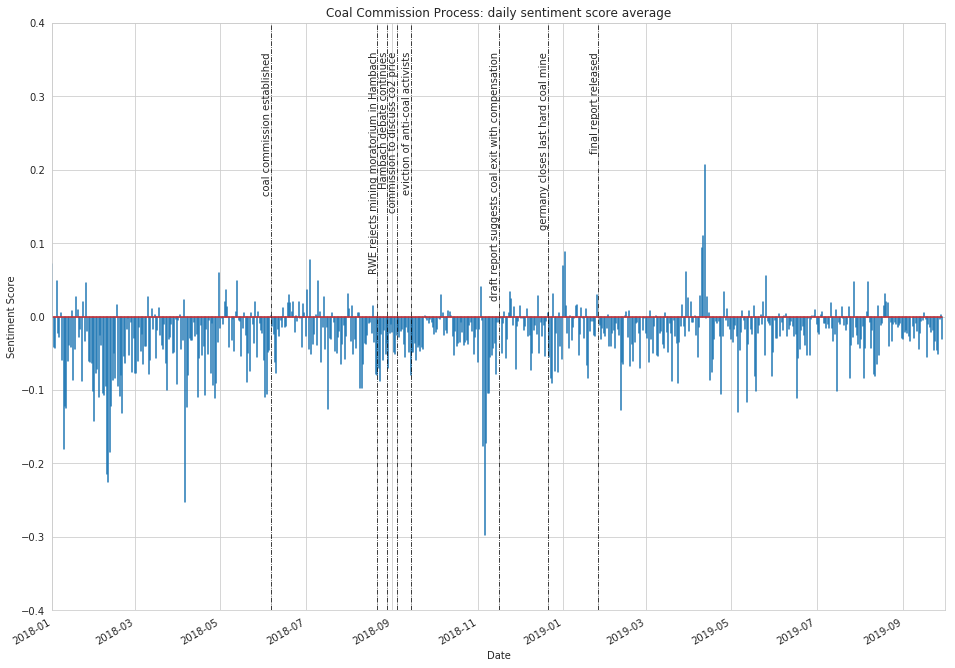

In [130]:
# overall picture with all events
# sentiment scores
fig, ax = plt.subplots(figsize=(16,12))
#sns.scatterplot(texts_de_daily.index, texts_de_daily, ax = ax)
ax.stem(texts_de_daily.index, texts_de_daily, markerfmt=' ')
ax.set(xlim=(datetime.datetime.strptime('2018-01-01', '%Y-%m-%d'), 
             datetime.datetime.strptime('2019-10-01', '%Y-%m-%d')),
       ylim=(-0.4,0.4),
       xlabel="Date",
       ylabel="Sentiment Score", 
       title="Coal Commission Process: daily sentiment score average")

# adding event titles
ax.axvline(x=(datetime.datetime.strptime('2018-06-06', '%Y-%m-%d')), ls ='-.',lw='0.75', c = 'k')
plt.text((datetime.datetime.strptime('2018-06-06', '%Y-%m-%d')-datetime.timedelta(days=6)),0.35,
         'coal commission established',rotation=90, fontsize=10)
ax.axvline(x=(datetime.datetime.strptime('2018-08-21', '%Y-%m-%d')), ls ='-.',lw='0.75', c = 'k')
plt.text((datetime.datetime.strptime('2018-08-21', '%Y-%m-%d')-datetime.timedelta(days=6)),0.35,
         'RWE rejects mining moratorium in Hambach',rotation=90, fontsize=10)
ax.axvline(x=(datetime.datetime.strptime('2018-08-28', '%Y-%m-%d')), ls ='-.',lw='0.75', c = 'k')
plt.text((datetime.datetime.strptime('2018-08-28', '%Y-%m-%d')-datetime.timedelta(days=6)),0.35,
         'Hambach debate continues',rotation=90, fontsize=10)
ax.axvline(x=(datetime.datetime.strptime('2018-09-04', '%Y-%m-%d')), ls ='-.',lw='0.75', c = 'k')
plt.text((datetime.datetime.strptime('2018-09-04', '%Y-%m-%d')-datetime.timedelta(days=6)),0.35,
         'commission to discuss co2 price',rotation=90, fontsize=10)
ax.axvline(x=(datetime.datetime.strptime('2018-09-14', '%Y-%m-%d')), ls ='-.',lw='0.75', c = 'k')
plt.text((datetime.datetime.strptime('2018-09-14', '%Y-%m-%d')-datetime.timedelta(days=6)),0.35,
         'eviction of anti-coal activists',rotation=90, fontsize=10)
ax.axvline(x=(datetime.datetime.strptime('2018-11-16', '%Y-%m-%d')), ls ='-.',lw='0.75', c = 'k')
plt.text((datetime.datetime.strptime('2018-11-16', '%Y-%m-%d')-datetime.timedelta(days=6)),0.35,
         'draft report suggests coal exit with compensation',rotation=90, fontsize=10)
#ax.axvline(x=(datetime.datetime.strptime('2018-11-19', '%Y-%m-%d')), ls ='-.',lw='0.75', c = 'k')
#plt.text((datetime.datetime.strptime('2018-11-19', '%Y-%m-%d')-datetime.timedelta(days=6)),0.35,
#         'eastern coal states demand 60bn euro compensation',rotation=90, fontsize=10)
ax.axvline(x=(datetime.datetime.strptime('2018-12-21', '%Y-%m-%d')), ls ='-.',lw='0.75', c = 'k')
plt.text((datetime.datetime.strptime('2018-12-21', '%Y-%m-%d')-datetime.timedelta(days=6)),0.35,
         'germany closes last hard coal mine',rotation=90, fontsize=10)
ax.axvline(x=(datetime.datetime.strptime('2019-01-26', '%Y-%m-%d')), ls ='-.',lw='0.75', c = 'k')
plt.text((datetime.datetime.strptime('2019-01-26', '%Y-%m-%d')-datetime.timedelta(days=6)),0.35,
         'final report released',rotation=90, fontsize=10)

fig.autofmt_xdate()
plt.show()
#fig.savefig('plots/tweet_score_event_timeline.png', dpi=300)

### Launch of coal commission 2018-06-06

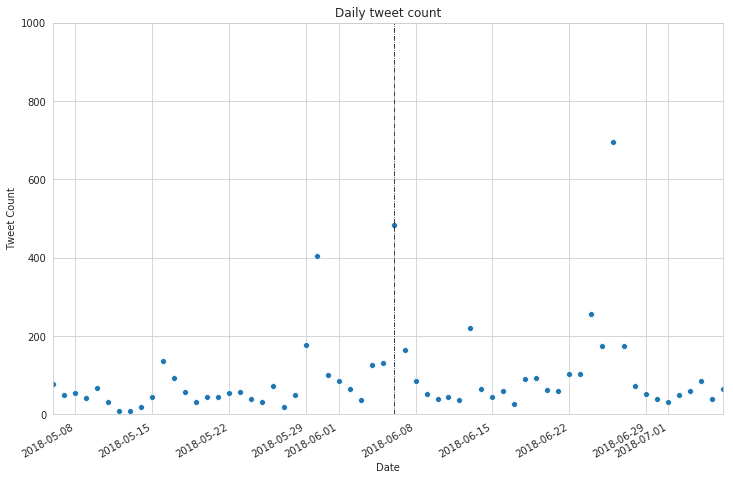

In [56]:
# tweet freq
fig, ax = plt.subplots(figsize=(12,8))
sns.scatterplot(texts_de_daily_count.index, texts_de_daily_count)
ax.set(xlim=(datetime.datetime.strptime('2018-05-06', '%Y-%m-%d'), 
             datetime.datetime.strptime('2018-07-06', '%Y-%m-%d')),
       ylim=(0,1000),
       xlabel="Date",
       ylabel="Tweet Count", 
       title="Daily tweet count")
ax.axvline(x=(datetime.datetime.strptime('2018-06-06', '%Y-%m-%d')), ls ='-.',lw='0.75', c = 'k')
fig.autofmt_xdate()
plt.show()

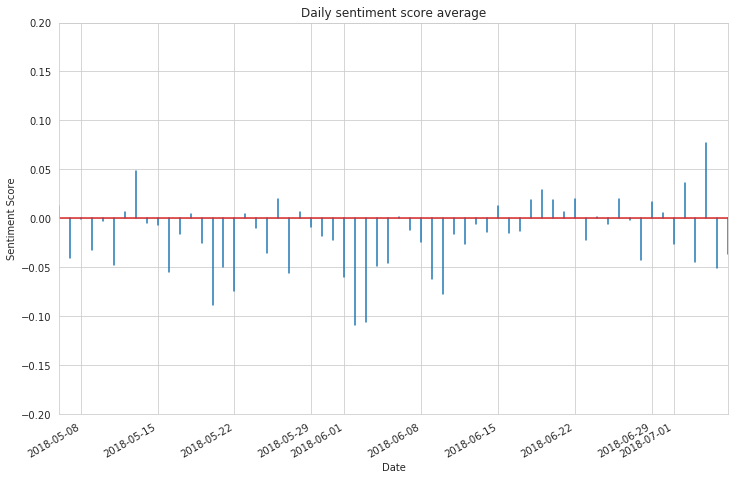

In [57]:
# sentiment scores
fig, ax = plt.subplots(figsize=(12,8))
#sns.lineplot(texts_de_daily.index, texts_de_daily, ax = ax)
ax.stem(texts_de_daily.index, texts_de_daily, markerfmt=' ')
ax.set(xlim=(datetime.datetime.strptime('2018-05-06', '%Y-%m-%d'), datetime.datetime.strptime('2018-07-06', '%Y-%m-%d')),
       ylim=(-0.2,0.2),
       xlabel="Date",
       ylabel="Sentiment Score", 
       title="Daily sentiment score average")
#ax.axvline(x=(datetime.datetime.strptime('2018-06-06', '%Y-%m-%d')), ls ='-.',lw='0.75', c = 'k')
fig.autofmt_xdate()
plt.show()

In [58]:
# tweets 
event1 = texts_de['date_only'] == datetime.date(2018,6,6)
event1_tweets = texts_de[event1]

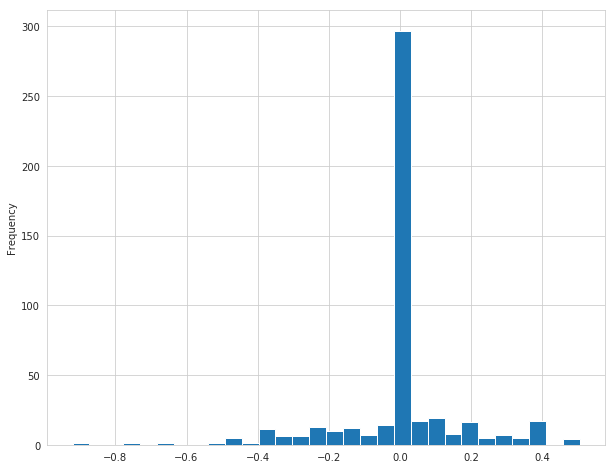

In [59]:
# spread of scores in the day
fig, ax = plt.subplots(figsize=(10,8))

event1_tweets['score'].plot.hist(bins=30)

plt.show()

In [60]:
event1_pos = event1_tweets.sort_values(by='score', ascending=False)
for i in event1_pos.index[:10]:
    print(event1_pos.loc[i]['text'])

Piratenpartei RT piratenparteibb: Ganz tolle Besetzung bei der Kohlekommission. Das wird wohl darauf hinaus laufen, dass noch der letzte Euro aus den Tagebauen gebuddelt wird und die Allgemeinheit dann auf den Renaturierungskosten mit einer zusammen brec… https://t.co/f2AFPL001K
Kohlekommission sollte mit Ruhe und Sorgfalt agieren https://t.co/3369hC4Bt3
📋 Kohlekommission sollte mit Ruhe und Sorgfalt agieren https://t.co/cgt6iejaFq ❚DIHK
@zukunft_erdgas Kohle ist ein Geschenk von Mutter Natur an den Menschen, um genutzt zu werden. Wir brauchen mehr Kohleabbau statt Kohleausstieg. #Kohlekommission https://t.co/ei0pjaWeAe
Heute wird die #Kohlekomission vom Bundeskabinett berufen. Mut zur Lücke braucht sie sicherlich nicht 😉 Denn bei aktuellem Trend würde die Lücke zu unseren #Klimaschutz-Zielen von alleine immer größer.  Mut zum #Kohleausstieg! https://t.co/L7dTcmPjCI
Gleichzeitig müssen Perspektiven für Regionen geschaffen werden, wo die Kohleindustrie wichtigster Arbeitgeber ist. Kohle

In [61]:
event1_neg = event1_tweets.sort_values(by='score')
for i in event1_neg.index[:10]:
    print(event1_neg.loc[i]['text'])

Wie Kohleausstieg @DFoest ? Atomkraft ist fast weg. Was sollen wir nachts bei schwachem Wind tun? Oder von Oktober bis Februar 16-10 Uhr? https://t.co/8rPQRD3VTD
Heute Start der #Kohlekommission. Vergoldung längst geplanter Abschaltungen!! Betroffene haben kein Gewicht in WBS, müssen schlechte Entscheidungen mittragen. Was sind Roten Linien, bei denen ihr aus WBS aussteigt? @bund_net @greenpeace_de @DNR_EUnews
https://t.co/jPx7uPWJCG
Die Einsetzung einer #Kohlekommission in der keines der Worte #Kohleausstieg, #Klimaschutz oder #Energiewende im Titel vorkommen - finde den Fehler!
Bitte, @tt_embrace! Und jetzt sagen wir mit dem #RC18 der #Kanzlerin und der #Kohlekommission dem Kampf an! :) https://t.co/RmB864mL6D
#Kohlekommission Hier werden die grünen Verweigerer wieder mal zum Gutachter gemacht. Merkel vernichtet dadurch weitere Tausende Arbeitsplätze.
Wenn die #Kohlekommission sich nicht damit befasst, warum ich immer wieder zu wenig #Kohle habe, ist sie sowieso nutzlos.
Schellnhuber